MCMC-basics
===========


Step One : Monte-Carlo (25 minutes)
-----------------------------------

#### Motivating example : which (somehow low dimension) unit d-ball has the largest volume? 

### Motivating example:

* Given an integer $d$ smaller than $15$, we are interested in the volume of the unit ball of dimension $d$.


* Intuition: 
    * the circle ($d=2$) has a volume of $\pi$.
    * the sphere ($d=3$) has a volume of $\frac{4}{3}\pi$.
    * does it keep growing with $d$? 


* if you want an exact value of the volume of the unit n-ball, it is: $$V_{n}={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}$$ where $\Gamma$ is Euler function - just to say that the aim here is not to get the real value but to have fun with Monte-Carlo Methods.

Monte-Carlo (MC) methods:
-------------------------

* used to estimate an expectation.
* based upon an application of the Strong Law of Large Numbers for estimation ...
* and on the Limit Central Theorem for error control.
* Several variance-reduction techniques are available in the literature.



Notations:
----------

* Let us have $E\subset\mathbb{R}^{d}\rightarrow\mathbb{R}$
* and some function  $\varphi(.)$ from $E$
* and finally $\mathbf{X}$ is a $d-$dimensional random vector (with known
density $f_{\mathbf{X}}$). 



* meaning we are restricted to a 1-dimensional output

These methods:
* allow the estimation of an expectation of form:

\begin{equation}
I=\mathbb{E}[\varphi(\mathbf{X})]
\end{equation}

* or on the integral form:

\begin{equation}
I=\int_{E}\varphi(\mathbf{x})f_{\mathbf{X}}(\mathbf{x})d\mathbf{x}
\end{equation}

* (these are the same things)
* (given that the integral exists)

Crude MC:
---------


* The main idea of this method is to generate a large number of *i.i.d.*
vectors with density $f_{\mathbf{X}}$, then to estimate $I$ with
the empirical mean of the $N$ values. 

* The Strong Law of Large Numbers allows to get an unbiased estimator of $I$:


\begin{equation}
\hat{I}=\frac{1}{N}\sum_{i=1}^{N}\varphi(\mathbf{x}^{i})
\end{equation}

 * with given $N$ and where $\mathbf{x}^{i}$ are i.i.d with $f_{\mathbf{X}}$.

### Example of Crude MC: estimating $\pi$

* We take E the unit square:
\begin{equation}
E = [-1,1]^{2}
\end{equation}

    

* We define the function $\varphi$ as "is my point in the unit circle"?
$$\varphi(\mathbf{x}) = 1_{\lVert \mathbf{x} \lVert_2 \leq 1}$$


* we set  $\mathbf{X} \sim \mathcal{U} [-1,1]^2$ so that 
$$
\begin{aligned}
f_{\mathbf{X}}(\mathbf{x}) &= f_{\mathbf{X}}(x_1,x_2)  \\
&= \frac{1}{2} 1_{\mathbf{x_1} \in [-1,1]} \frac{1}{2} 1_{\mathbf{x_2} \in [-1,1]}   \\
&= \frac{1}{4} 1_{\mathbf{x} \in E} 
\end{aligned}$$
* (the support of $f_{\mathbf{X}}$ is E so it eases the notations).


$$
\begin{aligned}I &=\int_{E}\varphi(\mathbf{x})f_{\mathbf{X}}(\mathbf{x})d\mathbf{x} \\
                 &=\int_{E} 1_{\lVert x \lVert_2 \leq 1}\frac{1}{4} 1_{\mathbf{x} \in E}  d\mathbf{x}  \\
                 &=\frac{\pi}{4}
\end{aligned}
$$

* since the surface of the circle of radius 1 is $\pi$.


* thus $\hat{\pi} = 4 \hat{I}$


* to get $\hat{I}$ we will just throw uniformly $N$ random points in $E$, count the number of which that lies in the unit circle. $\hat{I}$ is that number divided by $N$.

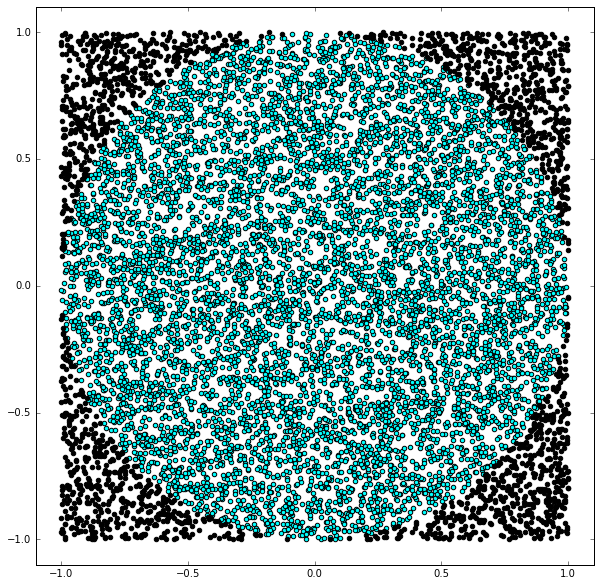

I_hat is : 0.7853.
pi_hat is : 3.1412.


In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 10000
x = np.random.uniform(-1,1,(N,2))
in_circle = np.sqrt(np.square(x[:,0])+np.square(x[:,1]))<=1

plt.figure(figsize=(10, 10))
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.scatter(x[in_circle,0],x[in_circle,1],c='cyan')
plt.scatter(x[~in_circle,0],x[~in_circle,1],c='black')
plt.show()
I_hat = np.sum(in_circle)/N
print("I_hat is : {}.".format(I_hat))
print("pi_hat is : {}.".format(I_hat*4))

Todo: variance.

Todo: calcul N balls 1..10, avec 95 est. On voit variance up; besoin de techniques de base pour réduire variance.